In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv").iloc[:,1:]
pd.set_option("display.max_columns", None)
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


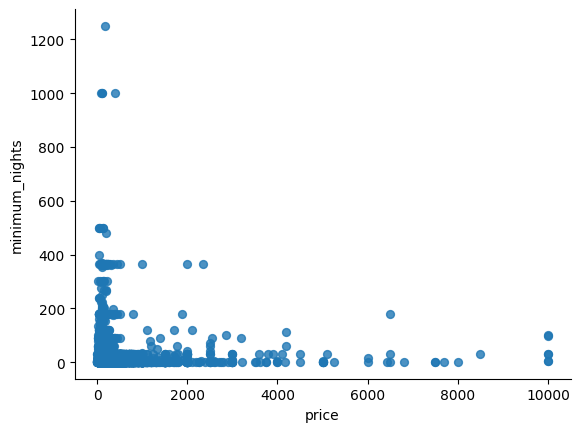

In [ ]:
# Uno de los gráficos sugeridos por Google Colab. Nos permite visualizar la relación
# entre el precio y la cantidad de noches que pasan allí sus inquilinos

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='minimum_nights', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.shape

(48895, 15)

In [ ]:
df.info()
#A partir de aquí podemos ver que las columnas que más valores nulos tienen son last_review
# y reviews_per_month
#Faltan alrededor del 20%
#Por otra parte, el resto de columnas están prácticamente completas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [ ]:
df.nunique()
#Vemos que en host_name solamente hay 11452 personas distintas, por lo que está claro que hay al menos un multipropietario (siendo lo más probable que haya muchos)


name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
#Este puede ser un buen momento para eliminar las columnas que, presumiblemente,
# no nos permitirán relacionarlas de forma lógica con las demás
df.drop(["name", "host_id", "host_name", "last_review"], axis=1, inplace=True)

#neighbourhood_group influirá en las demás por estar asociada al nivel adquisitivo
# de la zona, y lo mismo ocurre con neighbourhood y con las coordenadas

#room_type también influirá en el precio

#price es de las más importantes porque lo que las personas están dispuestas a pagar
# va siempre en relación a las demás características ue tenga la vivienda (cada uno
# le da más importancia a un aspecto u otro, pero el precio de mercado es el que es)

#minimum_nights tal vez pueda ayudarnos a identificar si hay viviendas que se alquilen
# muy puntualmente y a precios muy altos (para enventos concretos, como partidos o
# conciertos) o alguna otra distribución interesante que tal vez tengan las viviendas

#number_of_reviews. Si una vivienda es muy popular o muy poco popular en una web de
# anuncios es posible que esto influya en el precio al que el propietario se puede
# permitir ofrecerla y lo miso ocurre con reviews_per_month

#availability_365. Del mismo modo, la disponibilidad que tenga una vivienda afectará
# a su posicionamiento en el mercado

#calculated_host_listings_count. Es posible que los propietaros con muy pocas propiedades
# lleven el alquiler de su propiedad de manera distinta a quien tiene muchas, y esto
# afecte al precio


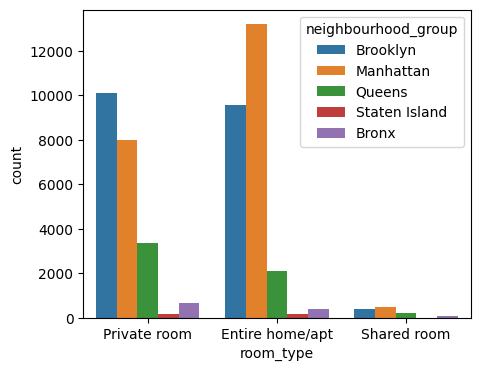

In [ ]:
#Ahora paso a analizar las variables categóricas entre sí. En este caso las de grupo
# de vecindario y tipo de habitación:

fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")

plt.show()



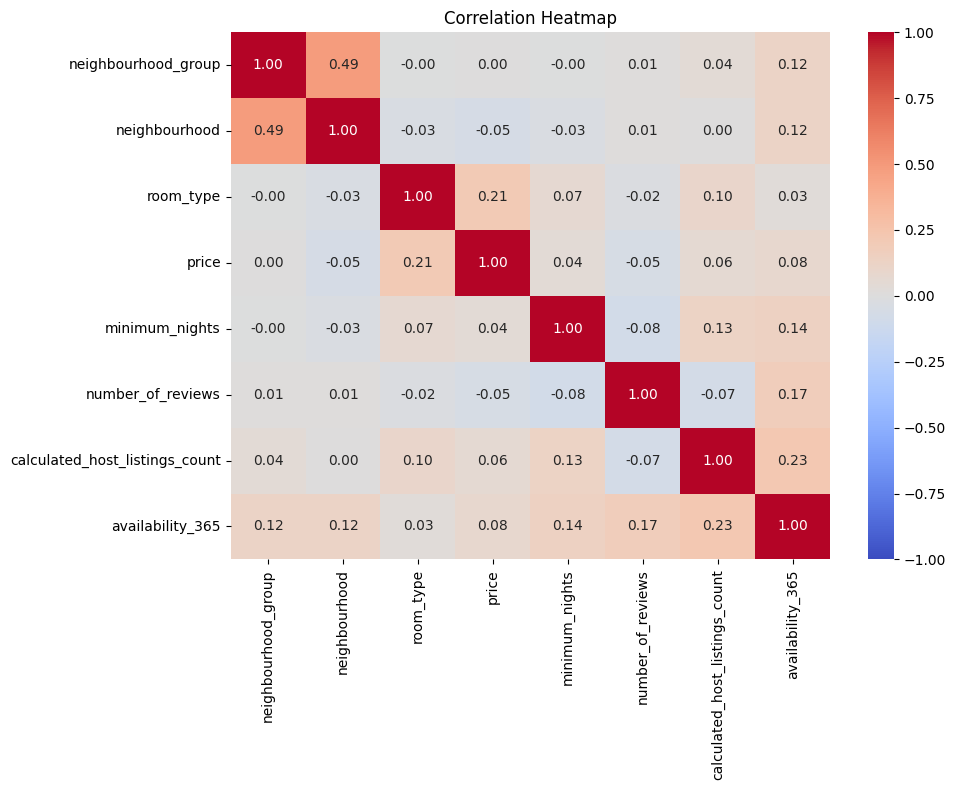

In [ ]:
columns_to_factorize = ["room_type", "neighbourhood_group", "neighbourhood"]
for column in columns_to_factorize:
    df[column] = pd.factorize(df[column])[0]


columns_for_correlation = ["neighbourhood_group", "neighbourhood", "room_type", "price",
                           "minimum_nights", "number_of_reviews", "calculated_host_listings_count",
                           "availability_365"]
correlation_matrix = df[columns_for_correlation].corr()

# Parámetros y título del heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.tight_layout()

plt.show()

# Más allá de las correlaciones evidentes (vecindario), el resto de variables no parecen tener
# una fuerte correlación entre ellas, a excepción de precio-tipo de habitación y de
# disponibilidad-casas por anfitrión.

# Ambas tienen sentido, el tipo de habitación influye en el precio que los inquilinos
# están dispuestos a pagar, mientras que es probable que las personas que tienen pocas
# casas tengan menos días disponibles porque ellos mismos también la usen en algún
# momento.


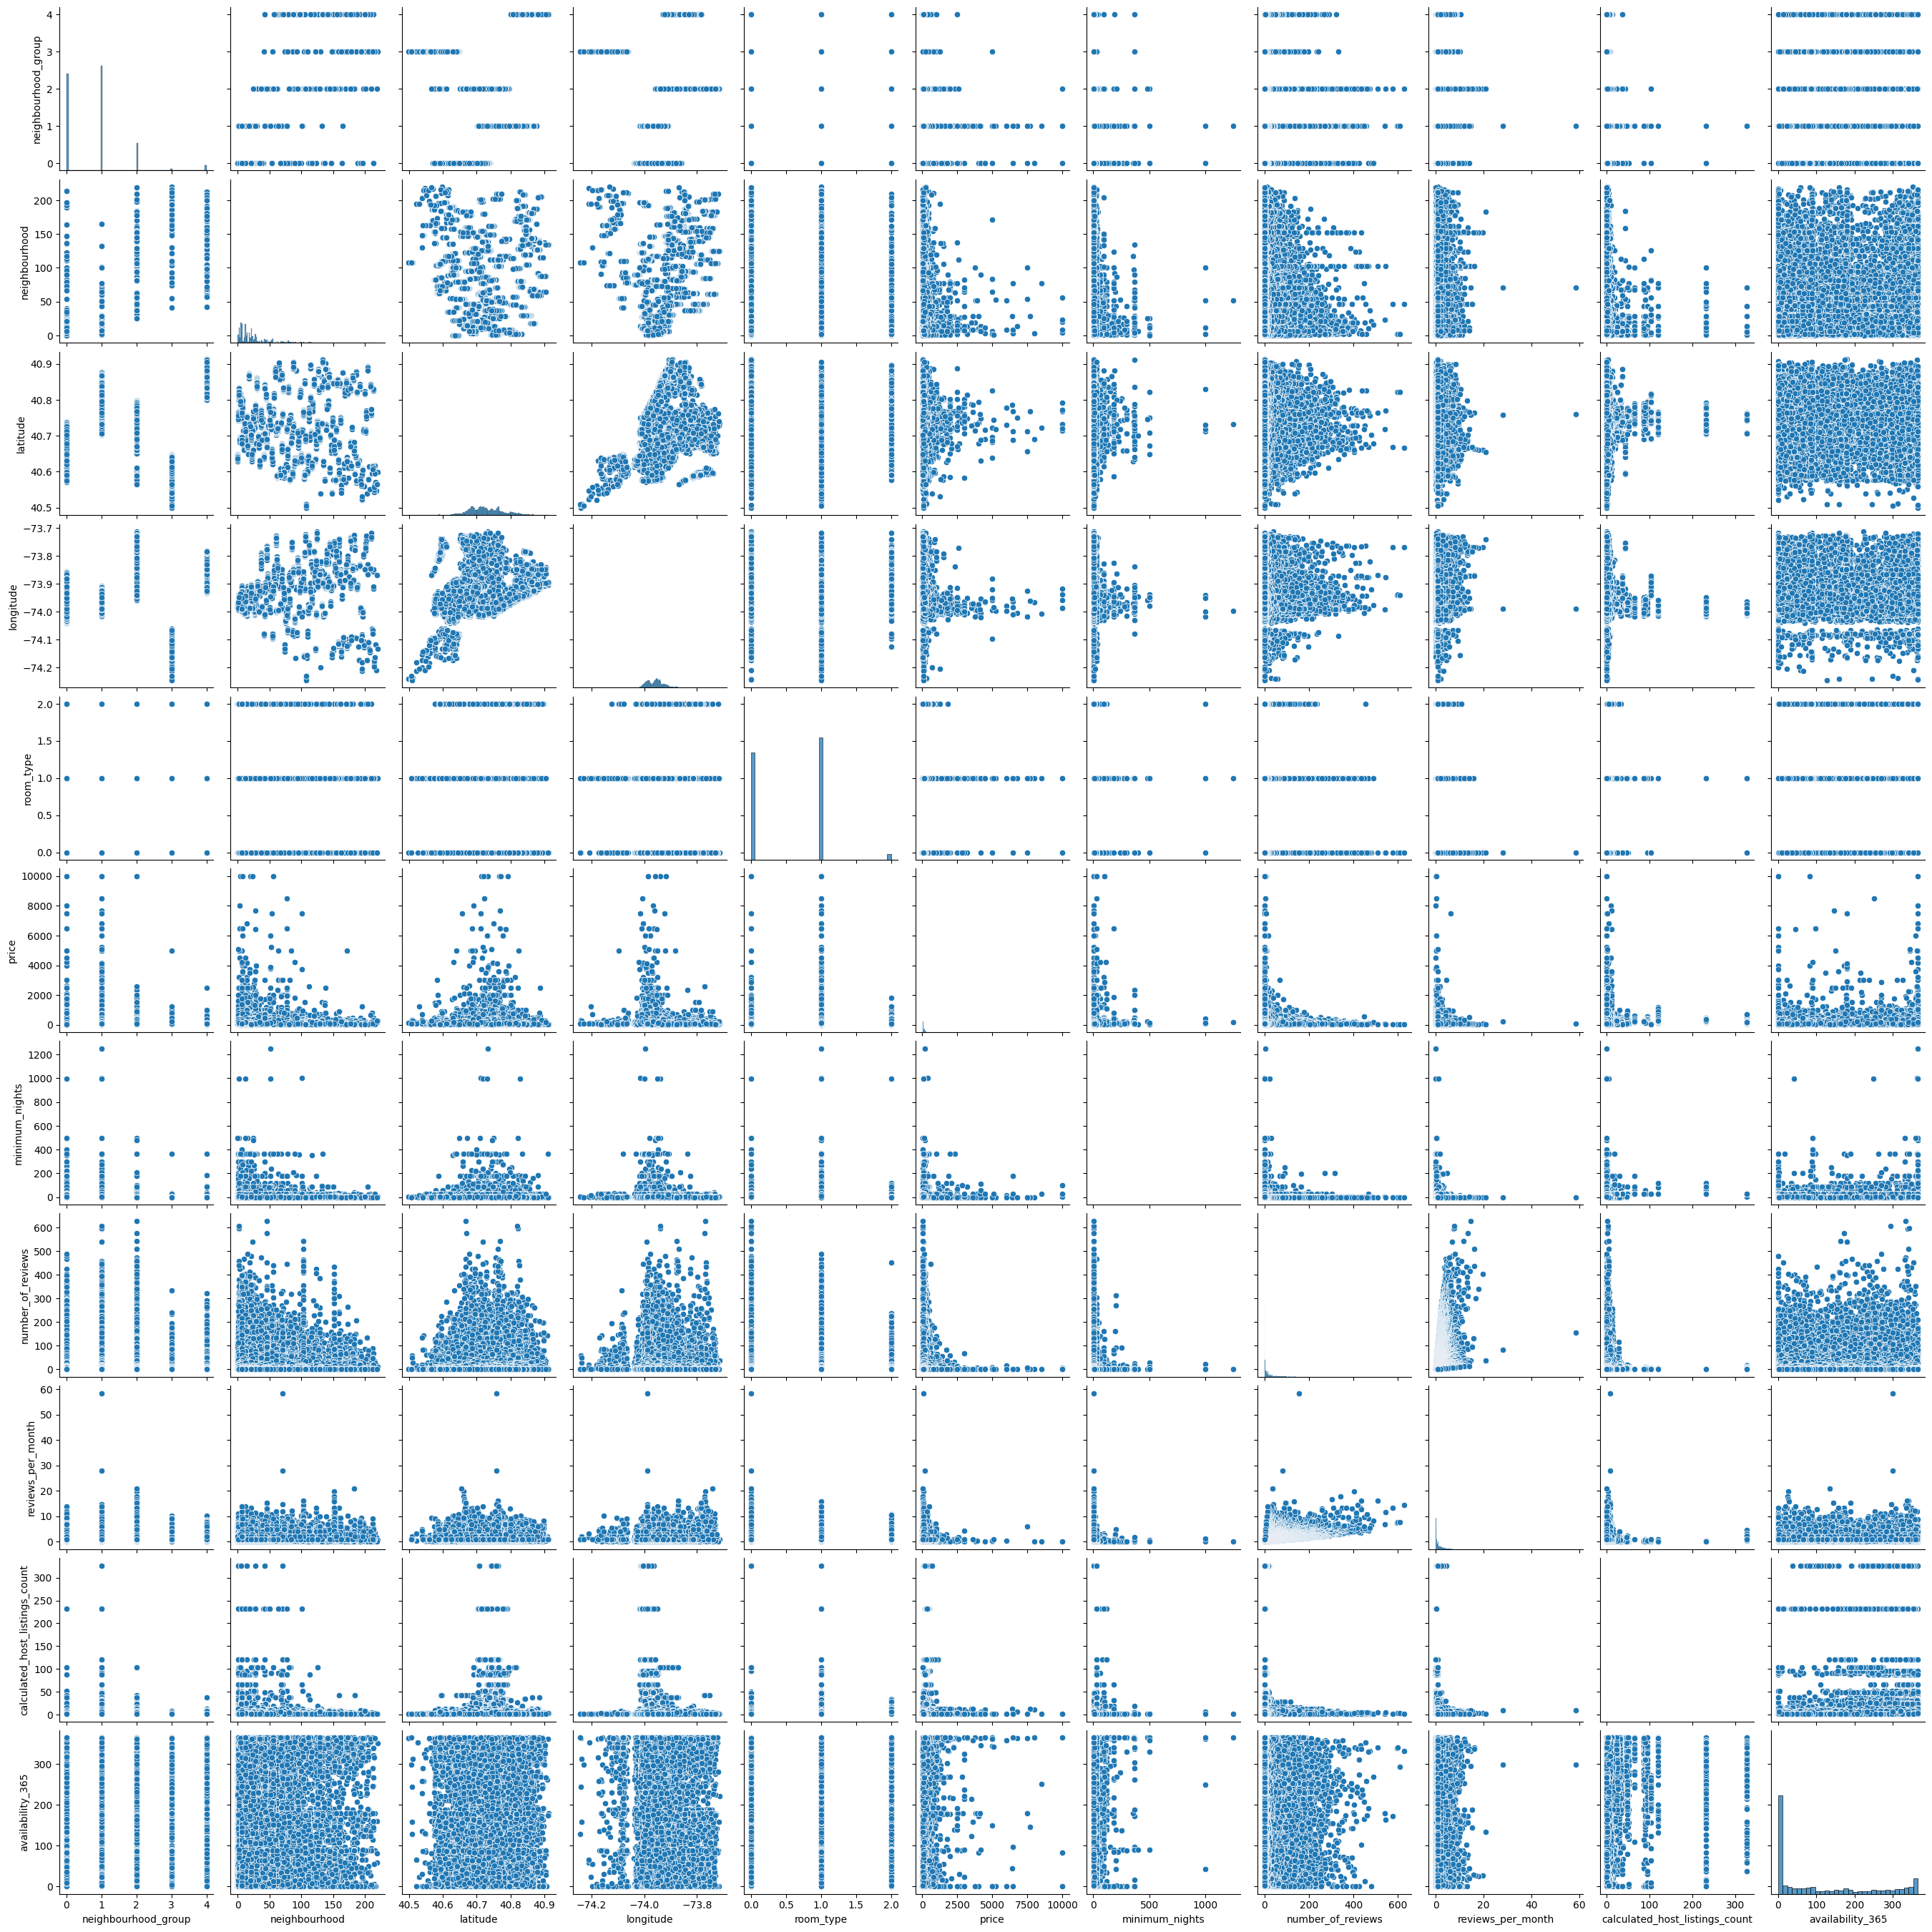

In [ ]:
sns.pairplot(data = df)

In [ ]:
df.describe()
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,0,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,1,1,40.75362,-73.98377,1,225,1,45,0.38,2,355
2,1,2,40.80902,-73.94190,0,150,3,0,NaN,1,365
3,0,3,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,1,4,40.79851,-73.94399,1,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,0,6,40.67853,-73.94995,0,70,2,0,NaN,2,9
48891,0,21,40.70184,-73.93317,0,40,4,0,NaN,2,36
48892,1,2,40.81475,-73.94867,1,115,10,0,NaN,1,27
48893,1,7,40.75751,-73.99112,2,55,1,0,NaN,6,2


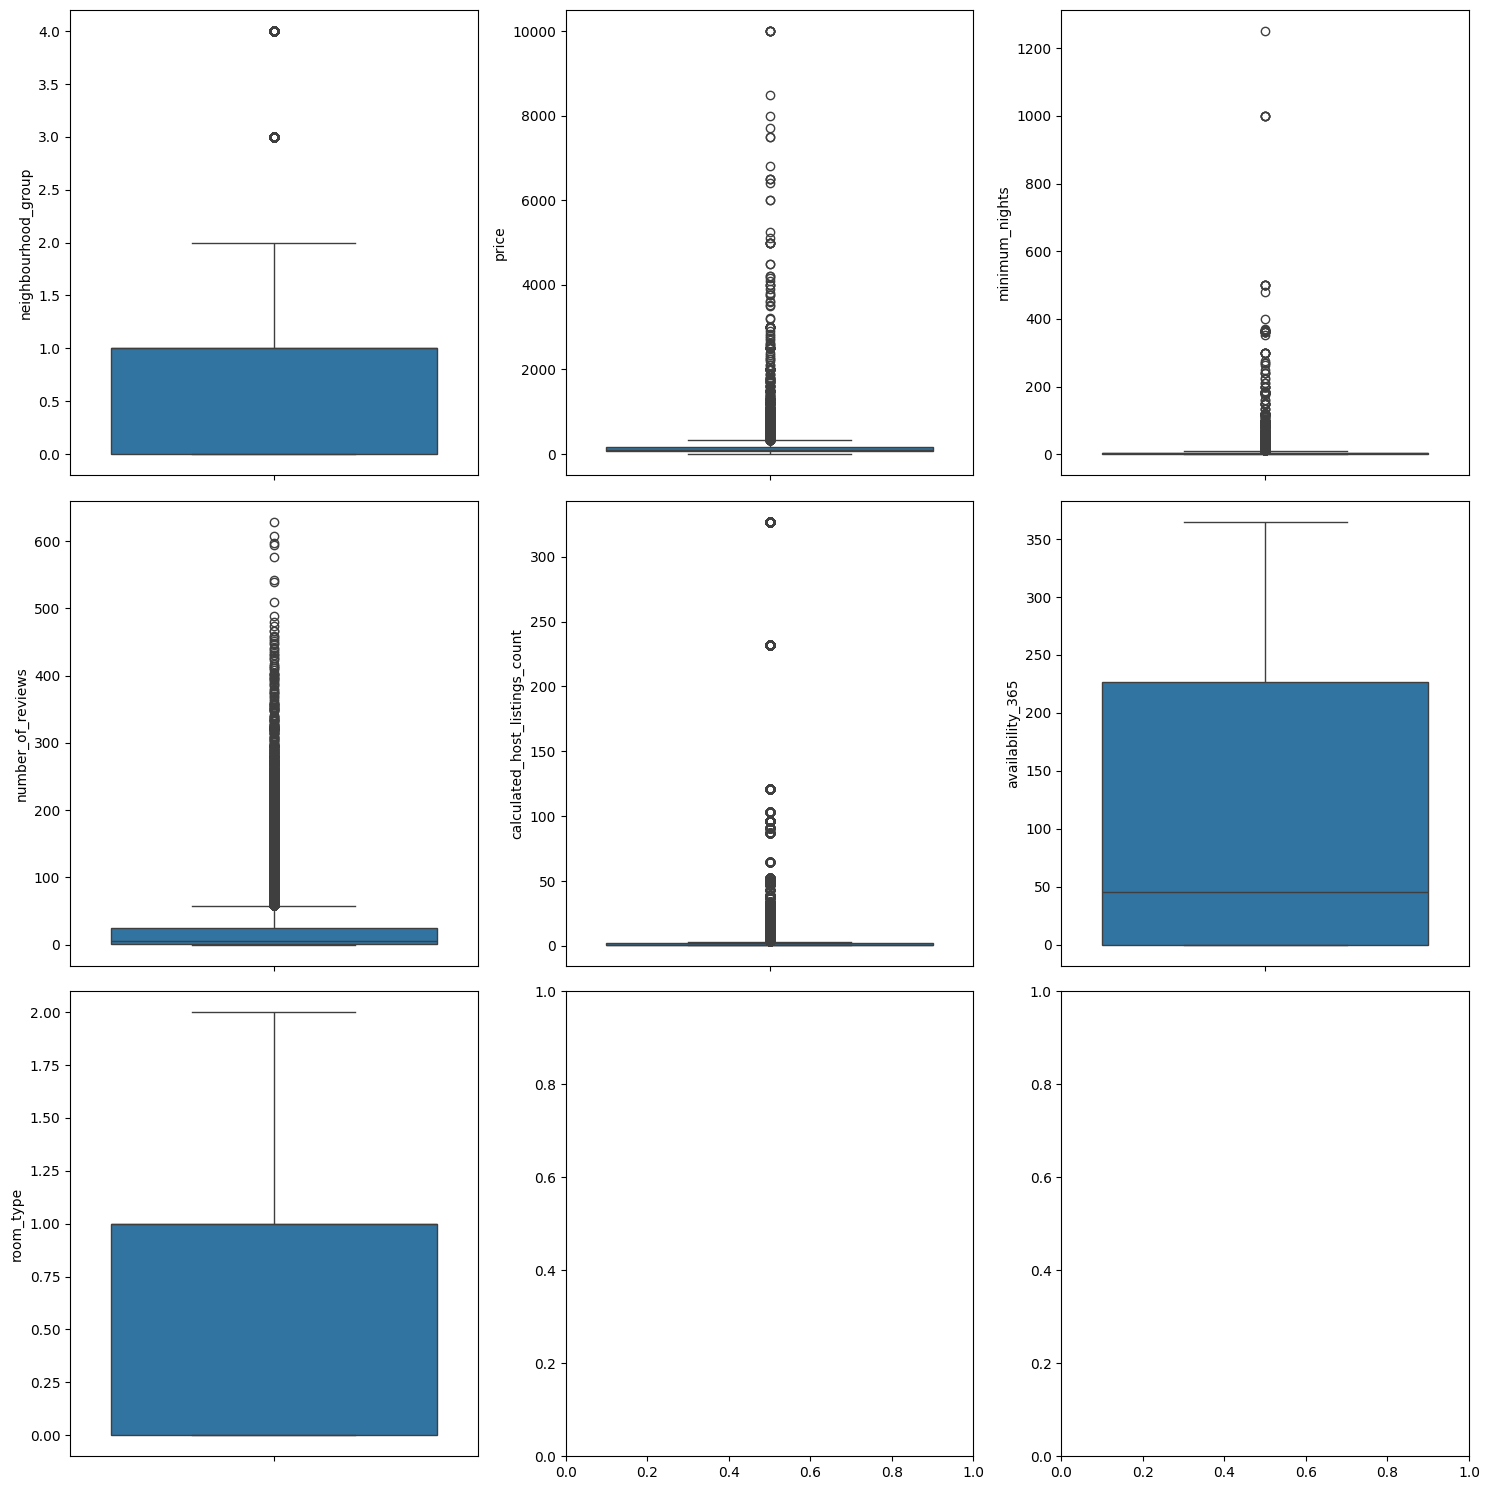

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df, y = "price")
sns.boxplot(ax = axes[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df, y = "room_type")

plt.tight_layout()

plt.show()

In [ ]:
price_stats = df["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# Rango intercuartil para precio

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior de los outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(price_iqr, 2)}")

Los límites superior e inferior de los outliers son 334.0 y -90.0, con un rango intercuartil de 106.0


In [ ]:
count_04 = sum(1 for x in df["calculated_host_listings_count"] if x in range(0, 5))
count_1 = df[df["calculated_host_listings_count"] == 1].shape[0]
count_2 = df[df["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  43254
Count of 1:  32303
Count of 2:  6658


In [ ]:
#Eliminamos los outliers

df = df[df["calculated_host_listings_count"] > 4]
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,0,40.64749,-73.97237,0,149,1,9,0.21,6,365
21,0,16,40.68069,-73.97706,0,130,2,130,1.09,6,347
22,0,16,40.67989,-73.97798,0,80,1,39,0.37,6,364
23,0,16,40.68001,-73.97865,0,110,2,71,0.61,6,304
92,0,3,40.68634,-73.96600,0,98,7,16,0.20,6,185
...,...,...,...,...,...,...,...,...,...,...,...
48857,2,129,40.69482,-73.86618,1,85,3,0,NaN,6,300
48867,0,67,40.59080,-73.97116,2,25,1,0,NaN,6,338
48868,0,67,40.59118,-73.97119,2,25,7,0,NaN,6,365
48878,2,81,40.74477,-73.87727,0,45,1,0,NaN,5,172


In [ ]:
# Contamos los NaN

df.isnull().sum().sort_values(ascending = False)

reviews_per_month                 1687
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
#Ahora ajustamos los datos para que queden proporcionalmente entre 0 y 1 con minmaxscaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "neighbourhood_group", "availability_365", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
df_scal["price"] = df["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,neighbourhood_group,availability_365,room_type,price
0,0.014308,0.000000,0.015337,0.00,1.000000,0.0,149
1,0.071542,0.000000,0.003067,0.25,0.972603,0.5,225
2,0.000000,0.001601,0.000000,0.25,1.000000,0.0,150
3,0.429253,0.000000,0.000000,0.00,0.531507,0.5,89
4,0.014308,0.007206,0.000000,0.25,0.000000,0.5,80


In [ ]:
#Dividimos los datos en entrenamiento y prueba

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Seleccionamos las características

selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

#Imprimimos el encabezado con las características que hemos seleccionado

X_train_sel.head()

,number_of_reviews,calculated_host_listings_count,availability_365,room_type
0,0.017488,0.000000,0.002740,0.5
1,0.003180,0.000000,0.000000,0.0
2,0.000000,0.003067,0.000000,0.0
3,0.138315,0.000000,0.731507,0.5
4,0.020668,0.000000,0.000000,0.0


In [ ]:
#Guardamos por separado los conjuntos de entrenamiento y de testeo en un CSV

X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)